In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [12]:
col_list = ["ozellik-1","ozellik-2","ozellik-3","ozellik-4","ozellik-5","ozellik-6","ozellik-7","cikis"]
df = pd.read_csv('https://raw.githubusercontent.com/irhallac/SisLab/main/hw_data/data_789.csv', usecols=col_list)
df

,ozellik-1,ozellik-2,ozellik-3,ozellik-4,ozellik-5,ozellik-6,ozellik-7,cikis
0,-1.408009,-7.665645,-7.238233,8.270052,2.316332,7.780697,8.746141,1
1,-2.360724,9.518347,1.848361,9.621156,-8.370089,1.615725,7.208179,0
2,-3.676865,9.766197,0.803233,7.475693,-8.519747,4.371836,5.475343,0
3,-3.536012,7.943393,2.466309,7.327269,-8.002648,2.893346,6.109701,0
4,-2.067875,-7.972082,-6.502296,7.715615,2.501575,8.161800,9.470502,1
...,...,...,...,...,...,...,...,...
137,-4.282893,9.610162,1.120459,7.917082,-6.939992,6.120812,4.270275,0
138,-0.498616,-8.679843,-10.801957,8.672719,3.747385,7.374688,11.400781,1
139,-2.500176,-7.915534,-6.377663,7.059155,3.537774,6.958498,8.028976,1
140,-2.939196,10.093757,0.279791,9.513667,-8.557074,2.188721,6.379760,0


In [291]:
cikis = df.iloc[:142, 7].values
giris = df.iloc[0:142, [0,4,5,6]].values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


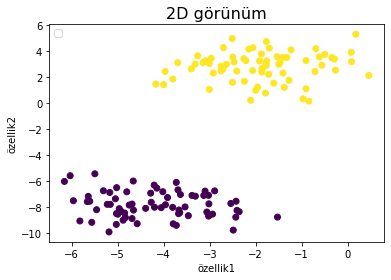

In [292]:
plt.title('2D görünüm', fontsize=16)

plt.scatter(giris[:142, 0], giris[:142, 1], c=cikis)
plt.xlabel('özellik1')
plt.ylabel('özellik2')
plt.legend(loc='upper left')

plt.show()

In [294]:
class Perceptron(object): 
    def __init__(self, ogrenme_orani=0.1, iter_sayisi=10):
        self.ogrenme_orani = ogrenme_orani
        self.iter_sayisi = iter_sayisi

    def ogren(self, X, y):
        #self.w = np.zeros(1 + X.shape[1])
        self.w = np.random.rand((1 + X.shape[1])) * 2
        self.hatalar = []
        for _ in range(self.iter_sayisi):
            hata = 0
            for xi, hedef in zip(X, y):
                degisim = self.ogrenme_orani * (hedef - self.tahmin(xi))
                self.w[1:] += degisim * xi
                self.w[0] += degisim
                hata += int(degisim != 0.0)
            self.hatalar.append(hata)
        return self

    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

    def tahmin(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, -1)

In [295]:
siniflandirici = Perceptron(ogrenme_orani=0.09, iter_sayisi=20)
siniflandirici.ogren(giris, cikis)

In [296]:
siniflandirici.w

array([ 1.48946599, -0.60917423, -0.06467116,  0.91174579,  0.03950406])

In [297]:
siniflandirici.hatalar


[71, 72, 72, 72, 72, 71, 72, 72, 72, 71]

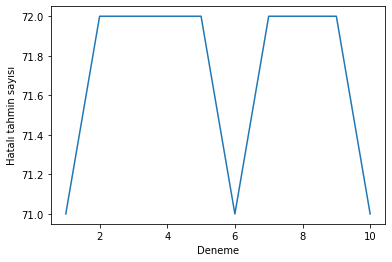

In [298]:
plt.plot(range(1, len(siniflandirici.hatalar) + 1), siniflandirici.hatalar)
plt.xlabel('Deneme')
plt.ylabel('Hatalı tahmin sayısı')
plt.show()